
# <font color='blue'> Table Of Contents </font> 

<font color='blue'>
    
- ### Introduction to Node Red
- ### Installation and Setup
- ### Basic data injection and node creation
- ### MQTT setup and publishing data
- ### Anomaly detection
- ### Data storage and viewing data on MongoDB
</font>

## <font color='blue'> Introduction to Node Red </font>

Node-RED is a powerful tool for building Internet of Things (IoT) applications with a focus on simplifying the ‘wiring together’ of code blocks to carry out tasks. 

It uses a visual programming approach that allows developers to connect predefined code blocks, known as ‘nodes’, together to perform a task. 

The connected nodes, usually a combination of input nodes, processing nodes and output nodes, when wired together, make up a ‘flows’.

Although Node-RED was originally designed to work with the Internet of Things, i.e. devices that interact and control the real world, as it has evolved, it has become useful for a range of applications.

## <font color='blue'> Installation & Setup </font>

Node red is an open source software available for various devices. You can visit the official node red website.   

Visit the website and choose the appropriate device. Official link is mentioned below: 

https://nodered.org/docs/getting-started/

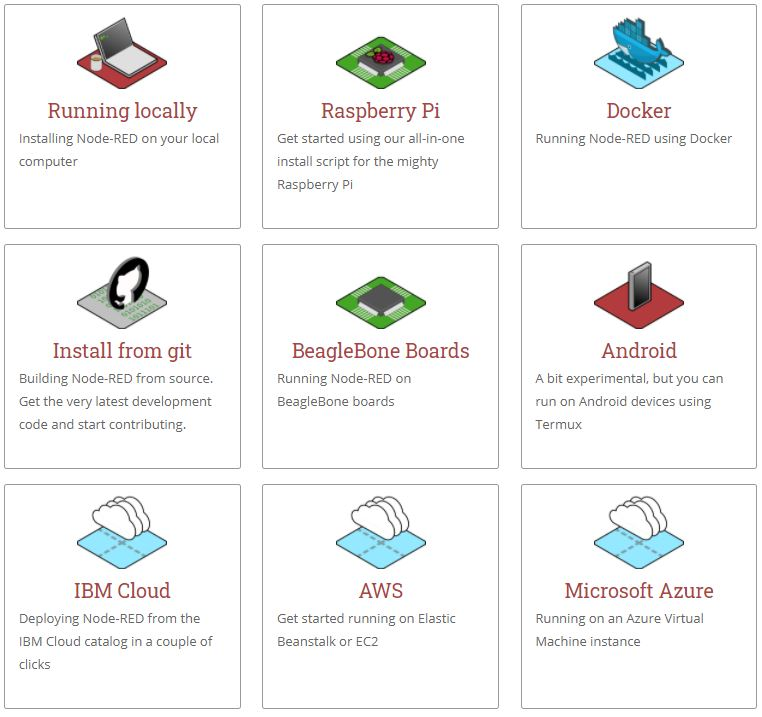

Choose the appropriate OS version, you need to install the relevant dependency/pre-requisite softwares mentioned on the website.

Start the node-red installation process. 

Once node-red is installed on your system you can open it by running the appropriate command.


An empty node-red window will look like this:

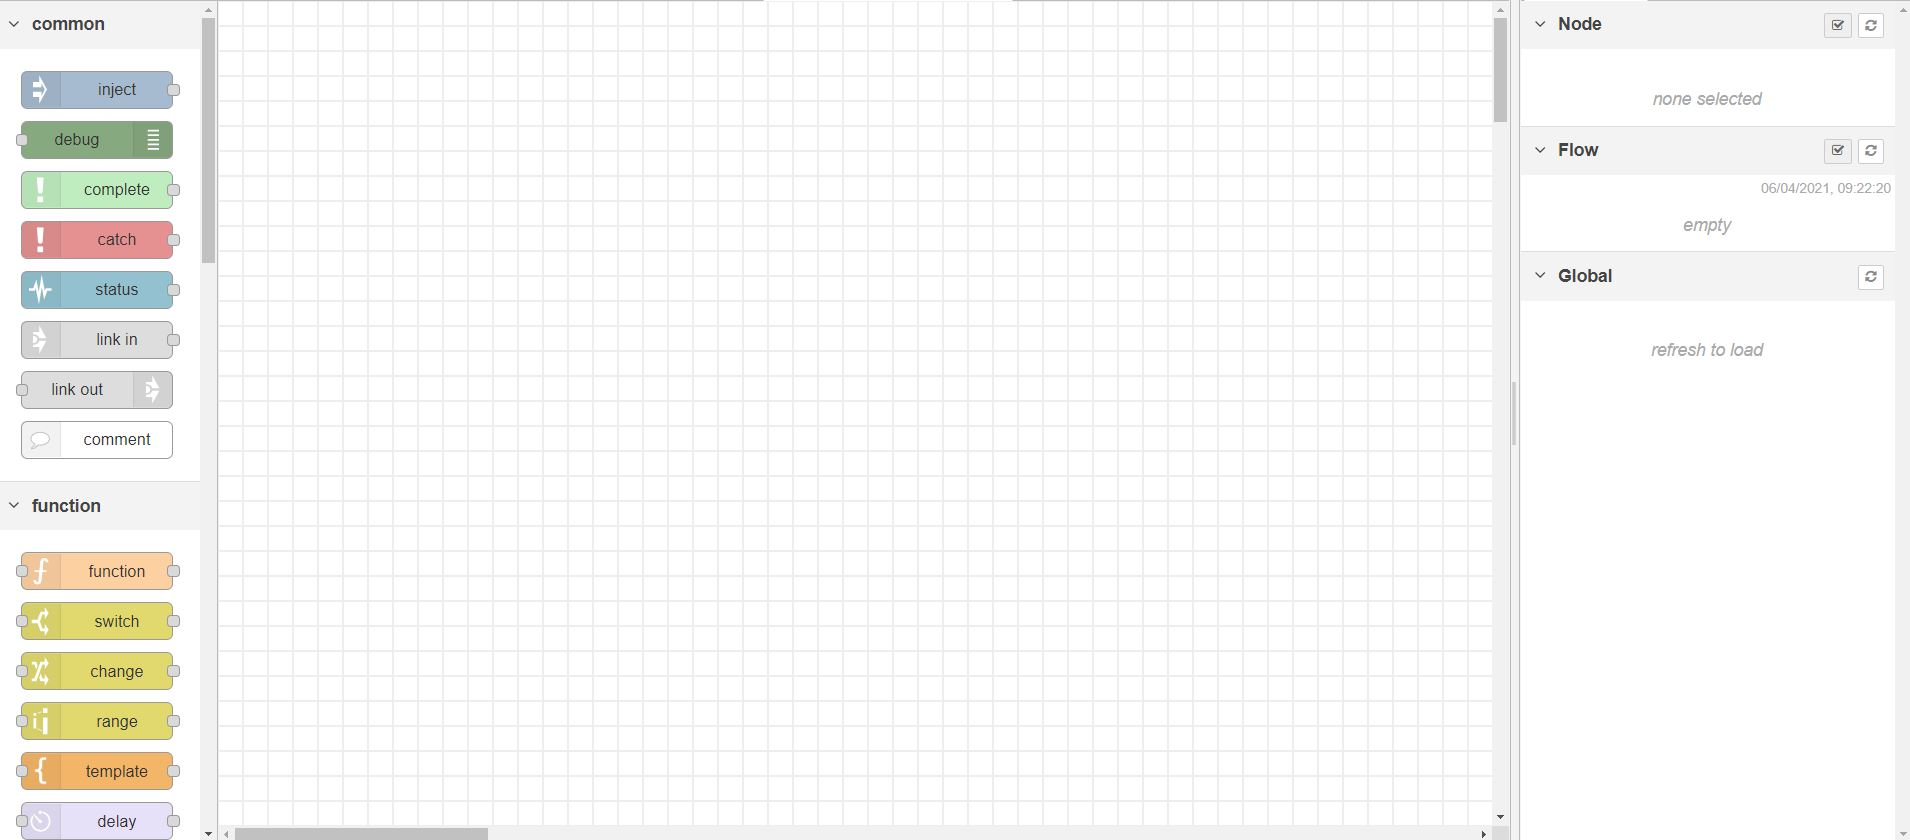

## <font color='blue'> Basic example </font>

In this section, we will implement some very basic nodes to understand the data flow in node-red. Further we will enhance the example by using one of the features of node-red `function` to create random set of data. 

We will also see how we can tune the interval based on our requirement. 

We will also introduce another feature of node-red named as `switch` to do the anomaly detection. 

Lets begin with the first step of the example implementation: 

* Open node red by giving the correct command from terminal

Now we will pick nodes available in left pane. You can simply perform choose nodes from the left pane and drop it on the chart. 

To create our first flow we will use following nodes:

* inject - 1 instance
* debug - 2 instance
* function - 1 instance 
* switch - 1 instance

Flow of this example is as following:

1. By using inject, which is renamed as `timestamp`, we can trigger the execution.
2. Then we will edit the `function` node to write simple javascript code to generate random temperature data. 
3. Once payload is created we will perform two tasks from the output point of `function`: (i) data printing and (ii) performing anomaly detection and printing the detected data. 

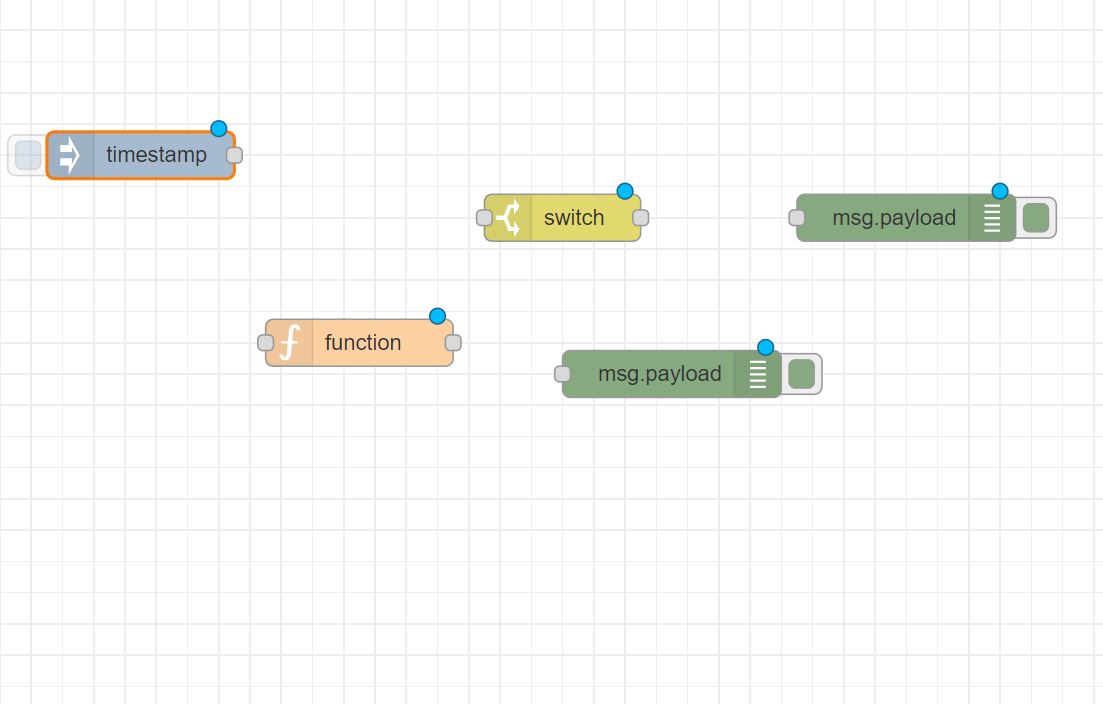

Once you have all the necessary nodes as mentioned in the above image, we will connect these nodes based on the given flow of the example. 

We will also see some of the basic features of each of these nodes. Once these nodes are connected, updated image will look as mentioned below: 

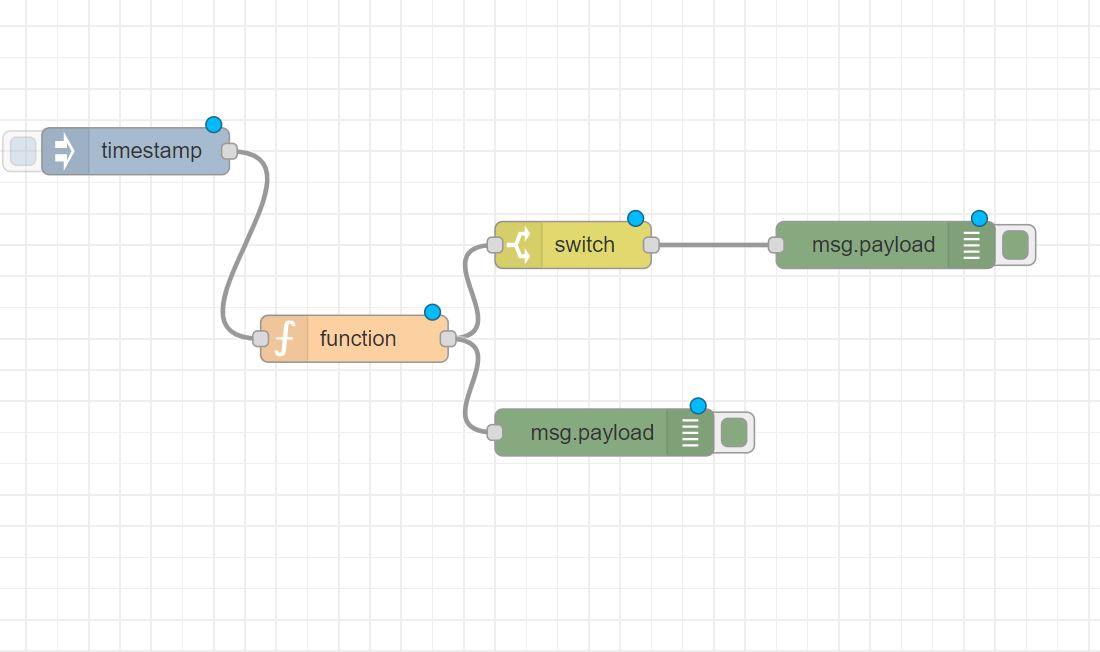

Let's edit each of these nodes to perform the execution:

1. Click on `timestamp` node and edit it out as mentioned in the following image. 

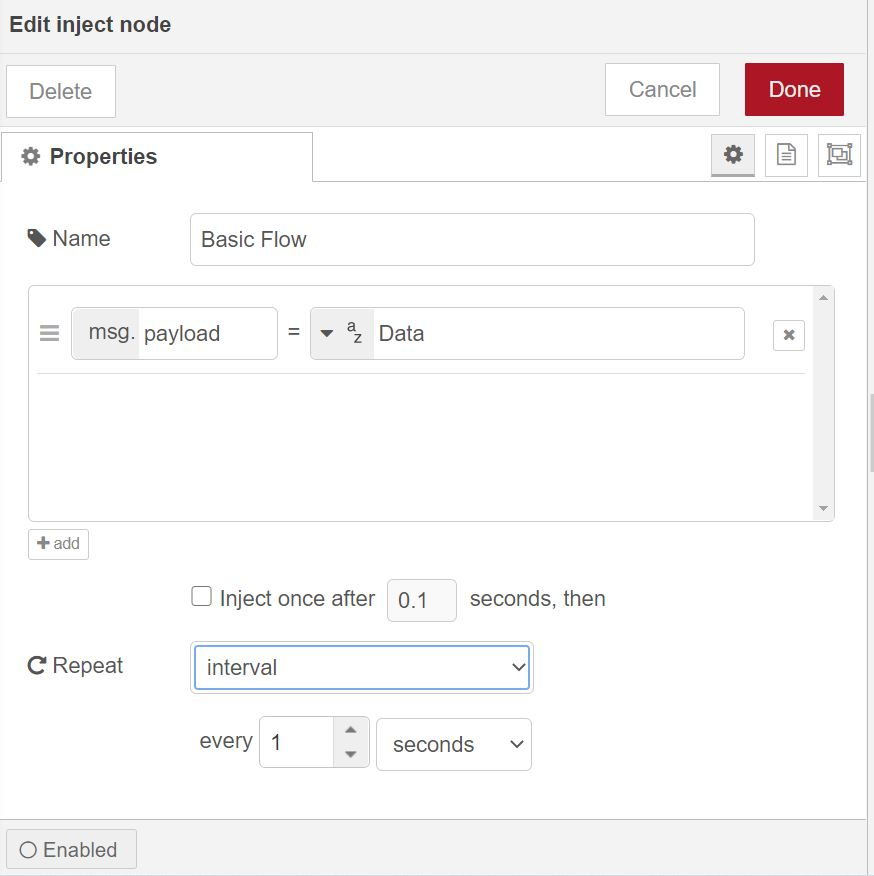

While editing this node we have provided interval as 1 second. You can also keep it as `None`. If it is None then in order to execute the flow you need to trigger the execution by clicking on the button. 

2. Click on function and provide name and write appropriate javascript code to generate the random data. 

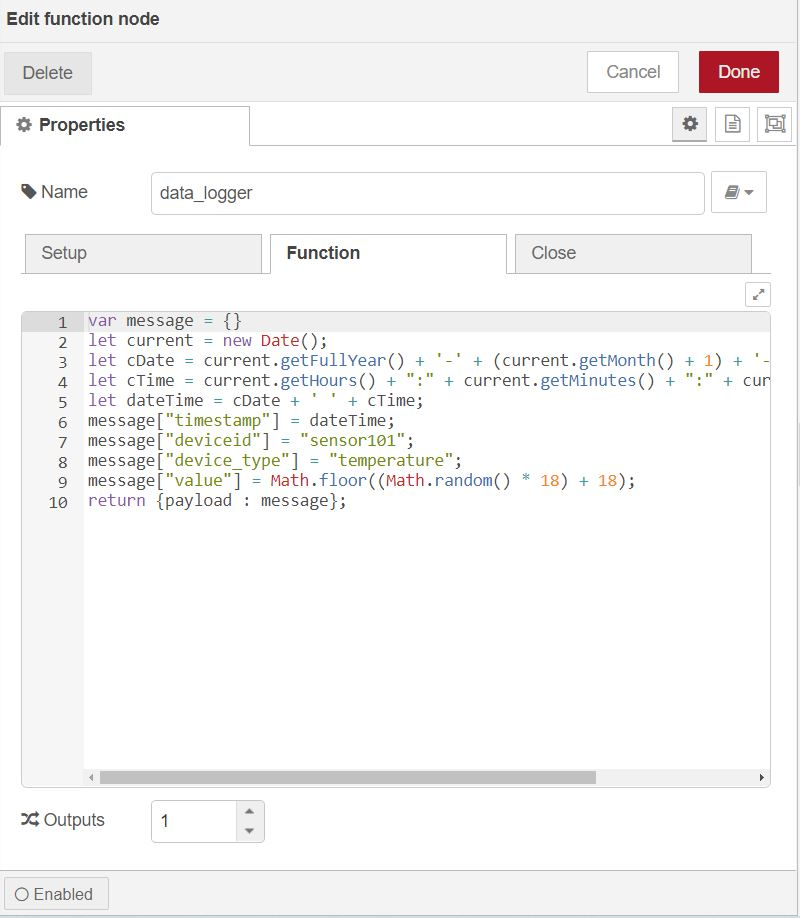

3. Click on switch and provide the condition to do anomaly detection. 

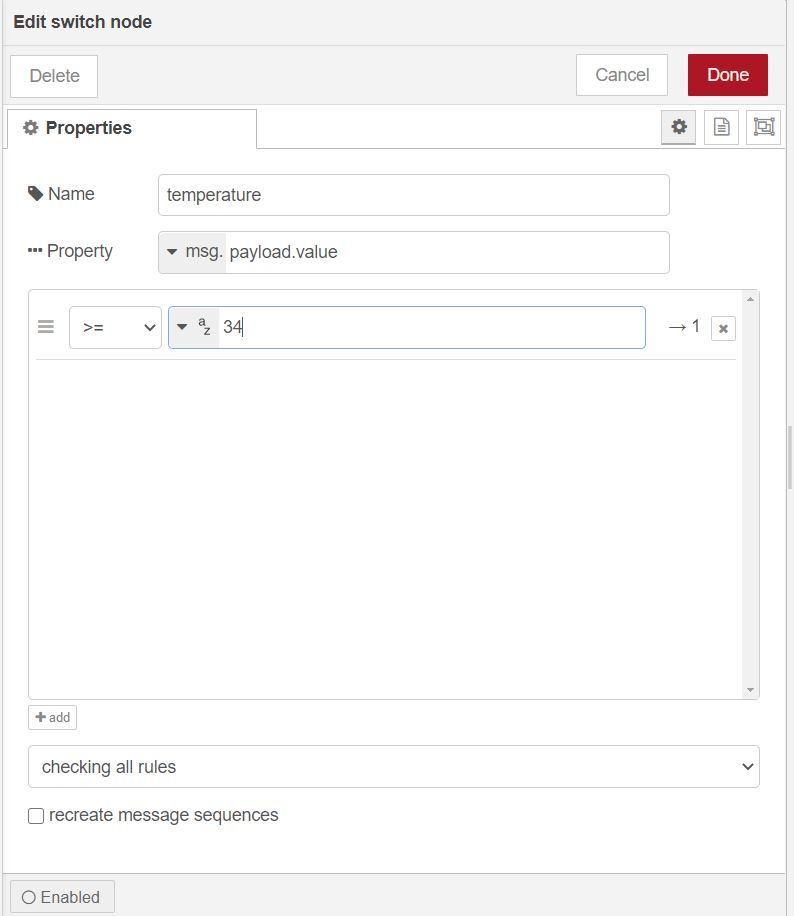

4. Click on `msg.payload` and provide the appropriate name for each of them as mentioned below: 

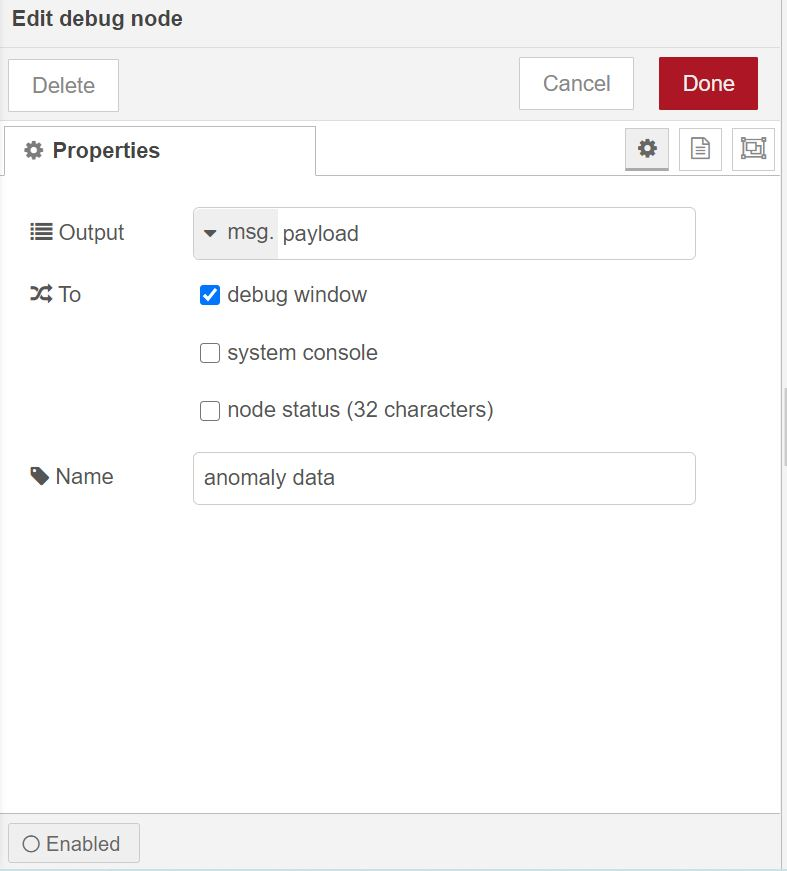

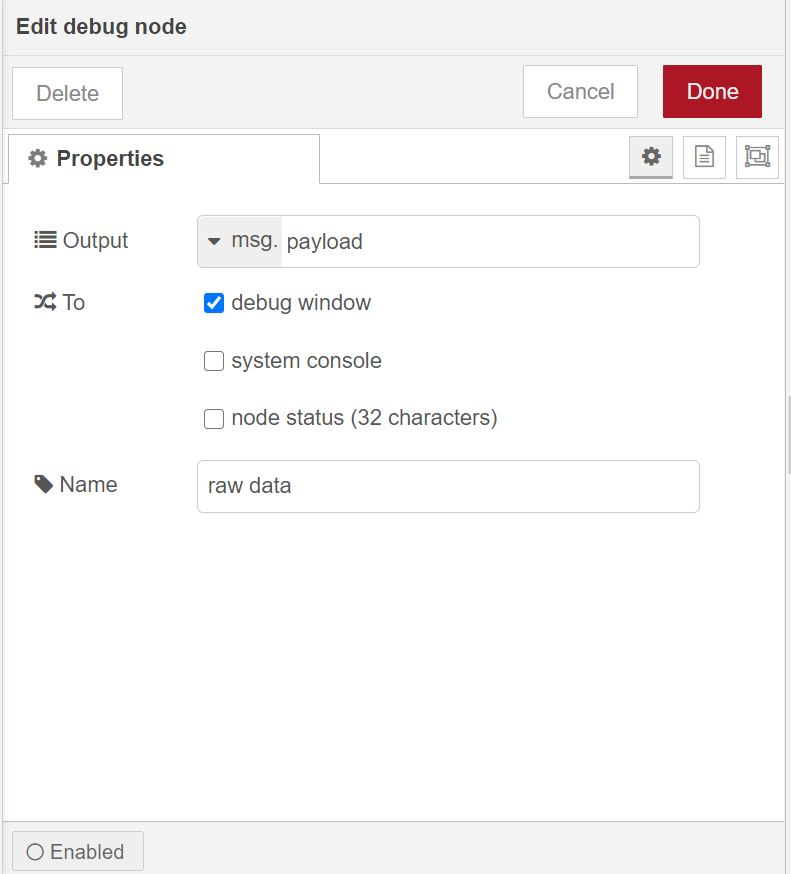
5. Once all the editing is done, the update nodes and their connection will look as the following mage. 

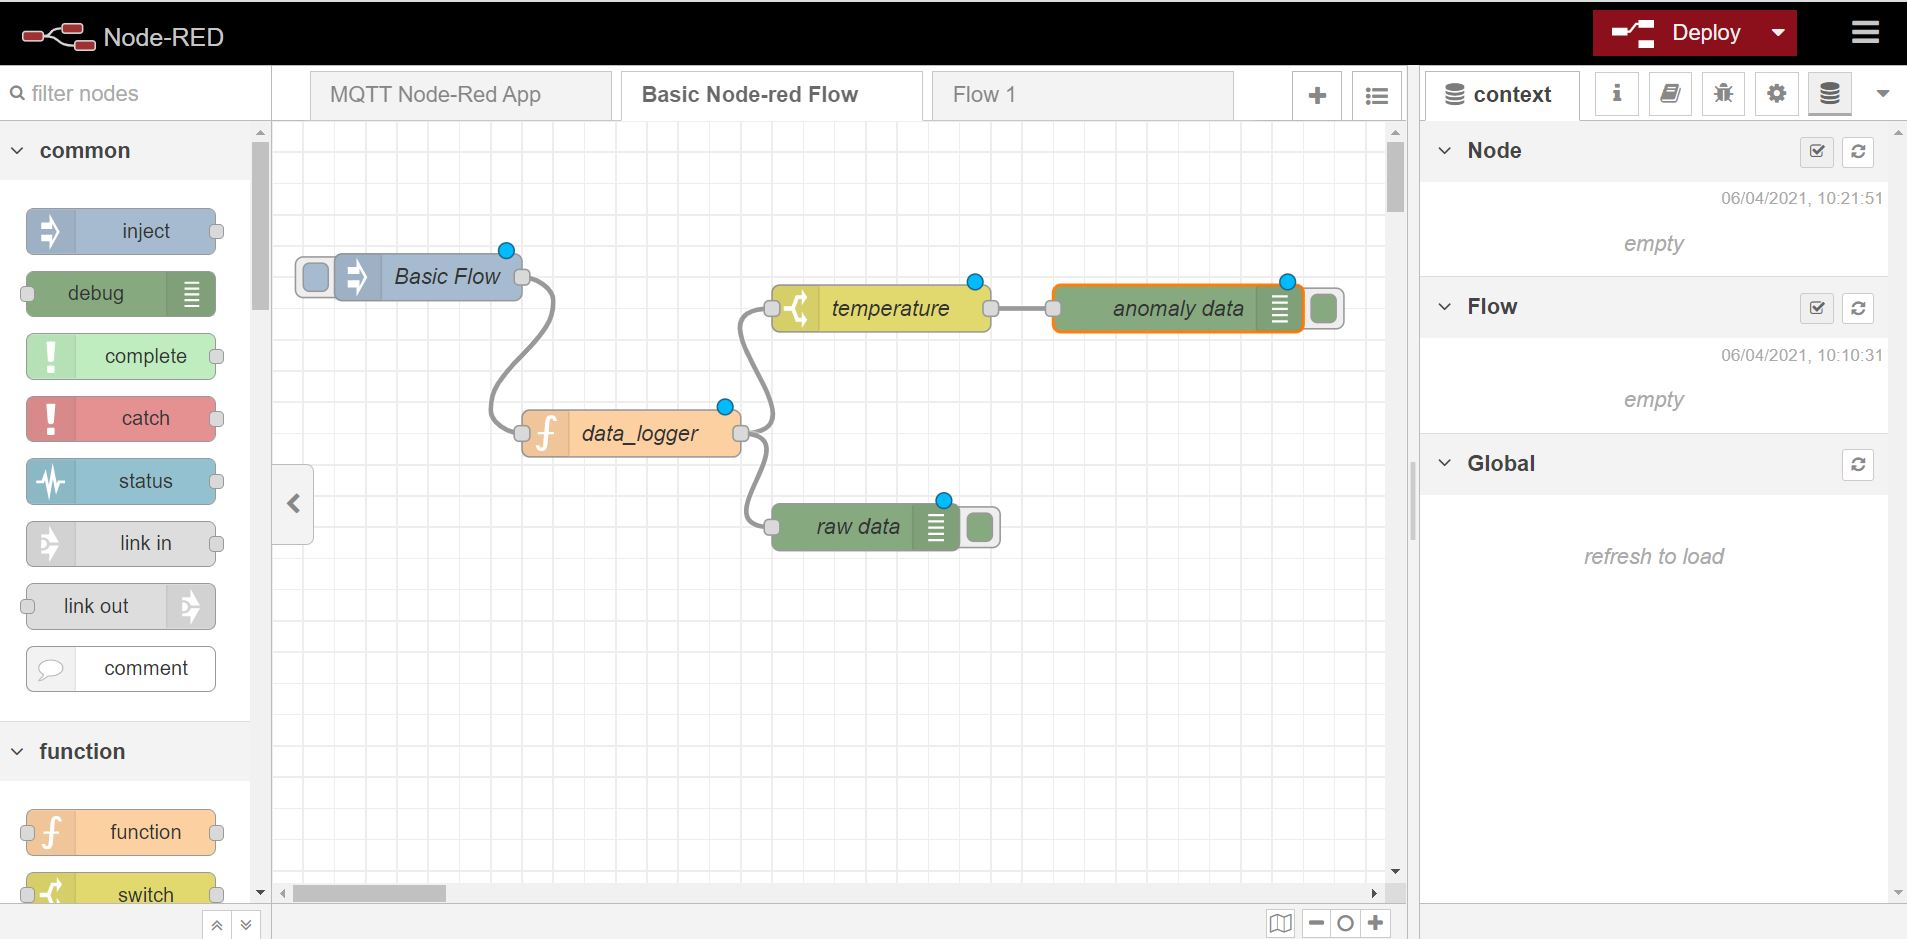

All the nodes are appearing with blue circle on them, it shows that there are some unsaved changes on these nodes. To save the flow click on `Deploy` button available in the top right corner. 

You should see a successful deployed message on your screen. 

You can also toggle on the debug button to enable and disable the messages available in the debugging section in right pane as mentioned below:

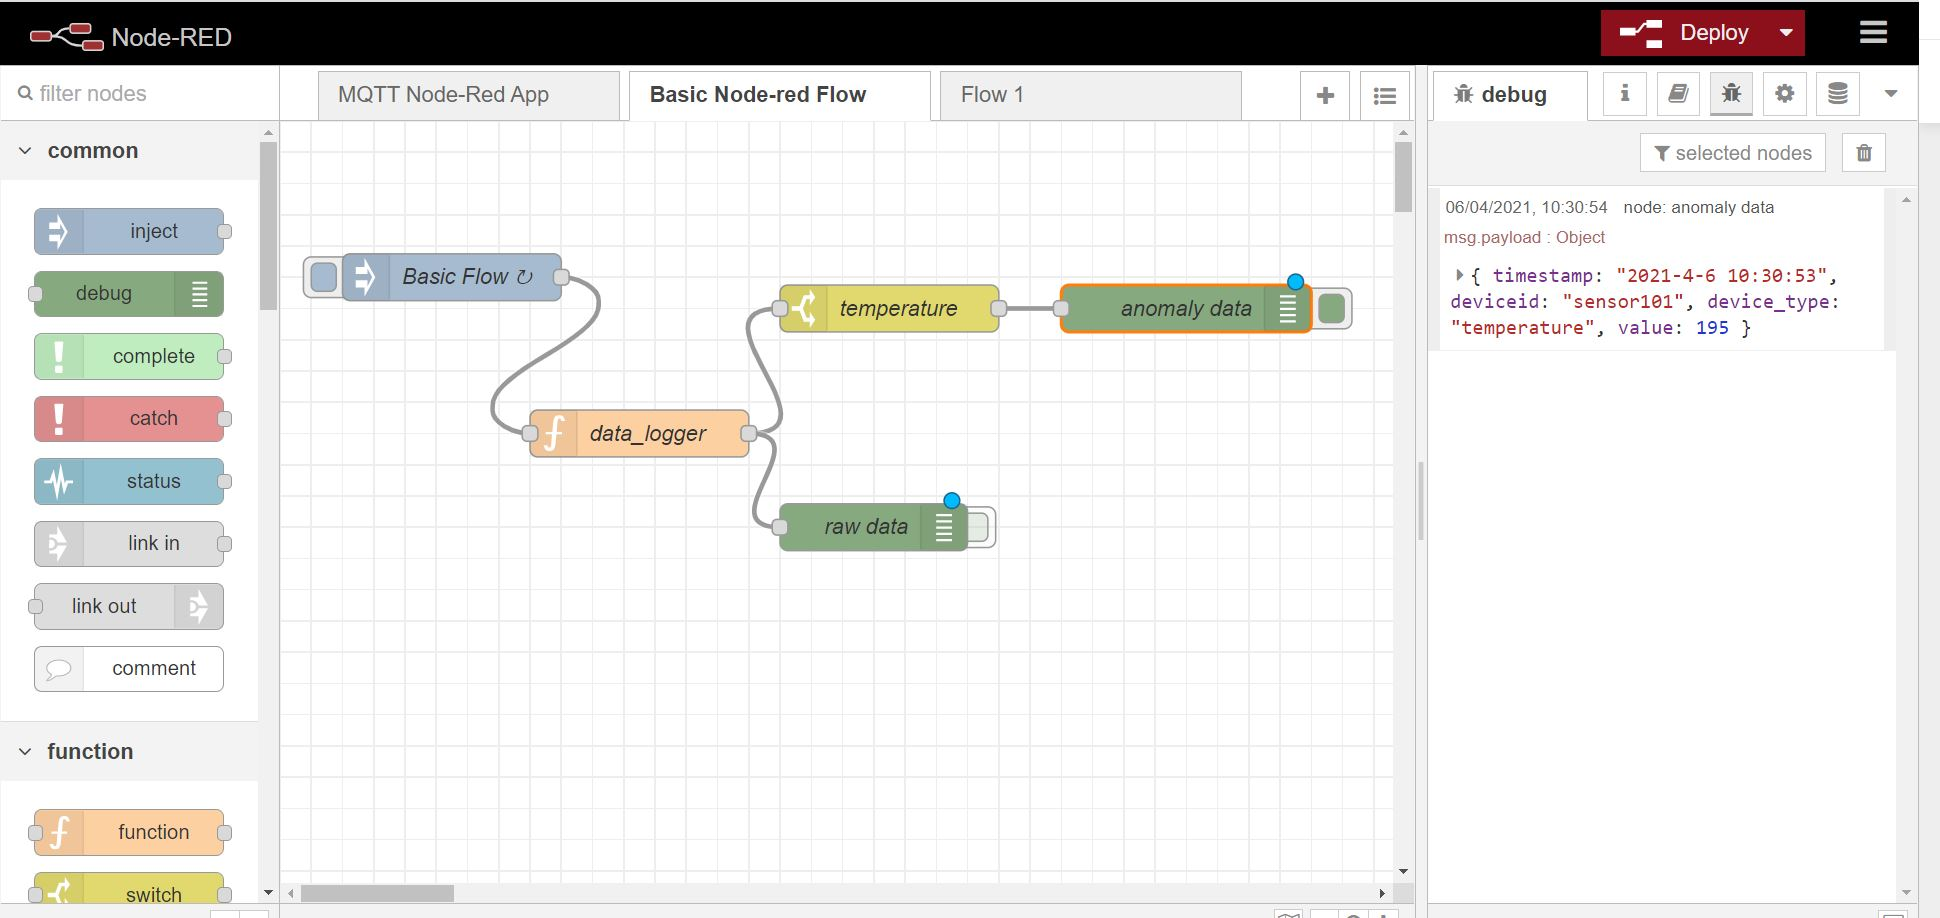


In [ ]:
# Javascript code used in the function node. 
# You can edit this code to add and delete more data points


var message = {}
let current = new Date();
let cDate = current.getFullYear() + '-' + (current.getMonth() + 1) + '-' + current.getDate();
let cTime = current.getHours() + ":" + current.getMinutes() + ":" + current.getSeconds();
let dateTime = cDate + ' ' + cTime;
message["timestamp"] = dateTime;
message["deviceid"] = "sensor101";
message["device_type"] = "temperature";
message["value"] = Math.floor((Math.random() * 18) + 18);
return {payload : message};


## <font color='blue'> MQTT Setup & data publishing </font>

In this section, we will be utilising the MQTT services available under node-red. To implement this example we will be using the `publish.py` script we have provided in Week-01 of IoT module. 

Flow of this example is mentioned below:

1. Create MQTT nodes to subscribe and publish to a paricular topic. In this example we are using the `publish.py` to publish the data, hence our main focus will be to subscribe to the topic.
2. Once we have subscribed to the topic by providing the detail related to the MQTT broker and port number we will see the raw data generated by the script. 
3. We will also use `function` to create a JSON object before printing the data or performing any other operation. 
4. On the output payload of the function we can create different switches to detect the anomaly for temperature, co2 and humidity. Alternatively, you can write a consoldiated function to handle all these three switches. 
5. The detected anomaly can be printed using debug nodes. 
6. We can also save the data in the database, to do this task we will be using mongodb. 
7. We can also view the data stored in mongodb. 


Look at the following image whch shows the complete flow of MQTT example. Please find the image below: 

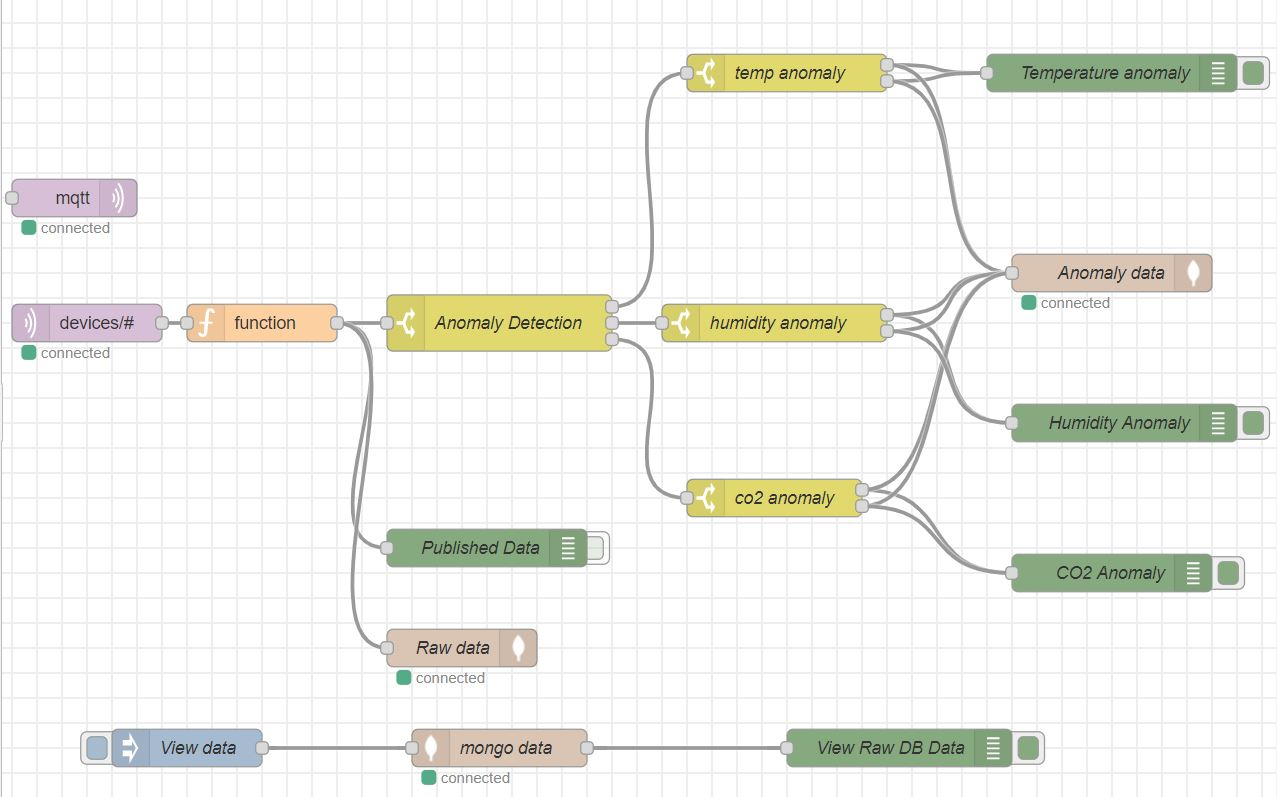

To implement this example you should create the following nodes and connect the nodes based on the above given explanation:

* mqtt in - 1 instance
* mqtt out - 1 instance
* function - 1 instance
* switch - 4 instance
* debug - 5 instance
* mongodb in - 1 instance
* mongodb out - 2 instance


Lets complete the MQTT setup on the MQTT nodes. On the left pane under network you can find MQTT services. 

1. Choose MQTT In and double click on the node to complete the MQTT setup. Click on server and provide the necessary details as mentioned in the following image. 

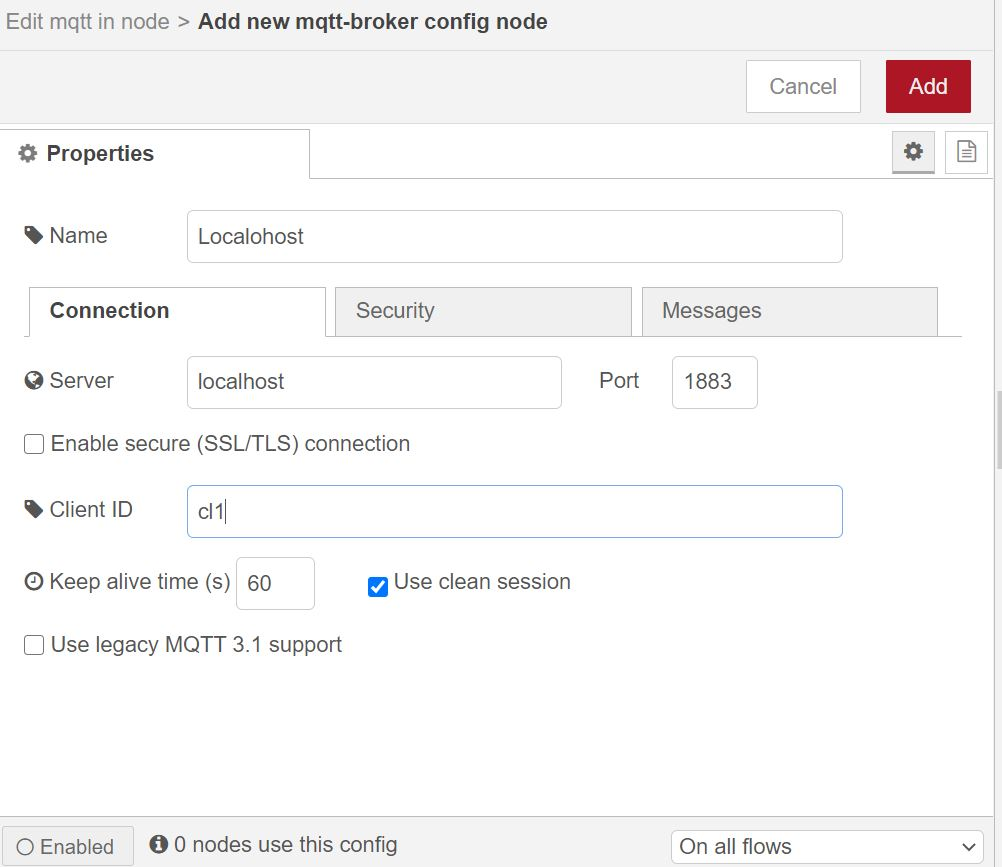


2. Once server is created, provide the topic name to receive message from the particular topic. Remeber this topic name should be same that we have provided in the config i.e. `devices/#` to subscibe to all three data points that are `temp`, `hum` and `co2`

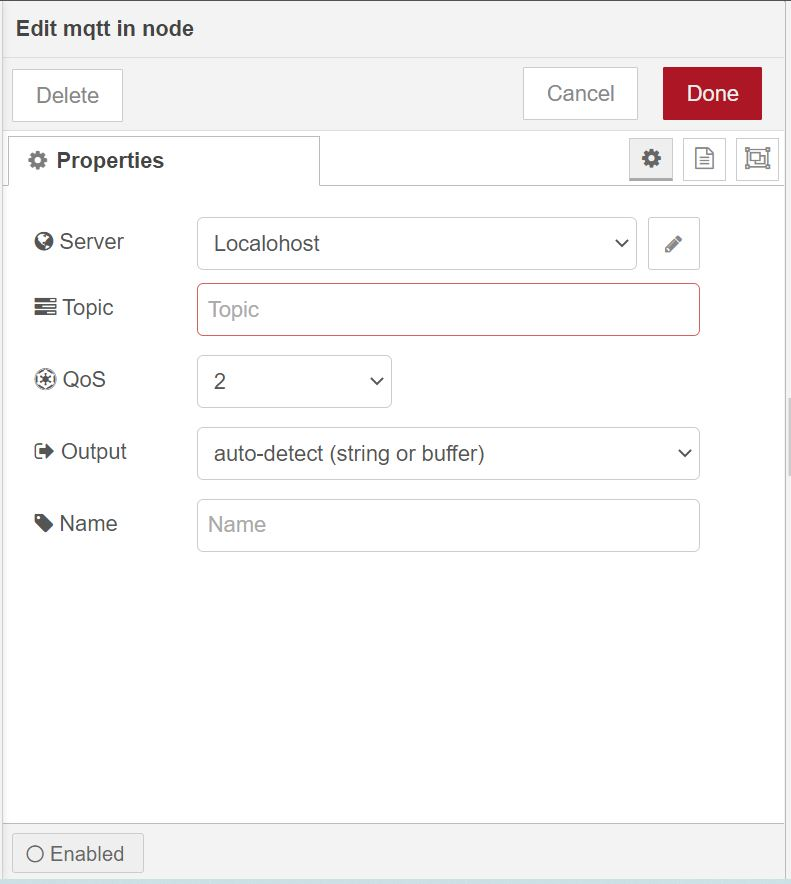

3. In this example we will be running the MQTT broker locally. Make sure that you are providing the correct Port number along with other related details.

4. Once MQTT broker service is running on your system, you should run the python script `publish.py`. If the details related to MQTT is correct then you will be able to view the data. 

    * Published data is in string format hence we wrote a simple function to convert the data entry in JSON object. 


### <font color='blue'> Anomaly detection </font>

In this section we will do anomaly detection based on the data points we are receiving. In a single switch we are first identifying the type of device. Look at the followig image for the reference:
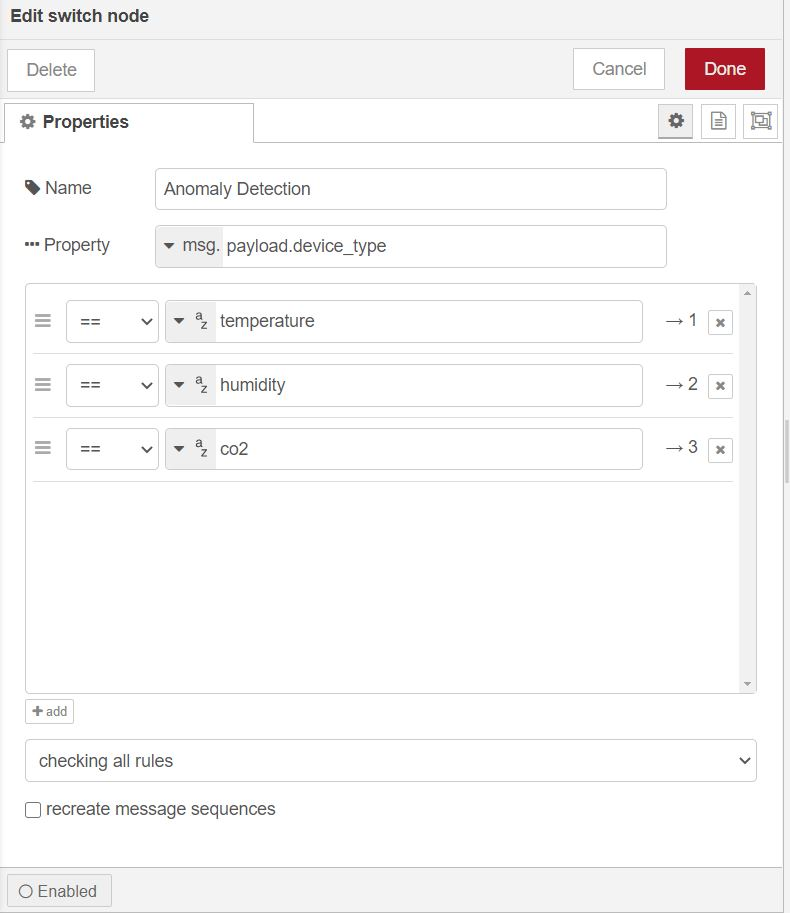

Once we have identified the device_type now for each device we need to emloy different switches to perfrm anomaly detection. Look at the following image for temperaure anomaly detection. In this we are looking for any temperature>27 and less than 23 as anomaly.

You can edit these nodes to decide your own anomaly range. 

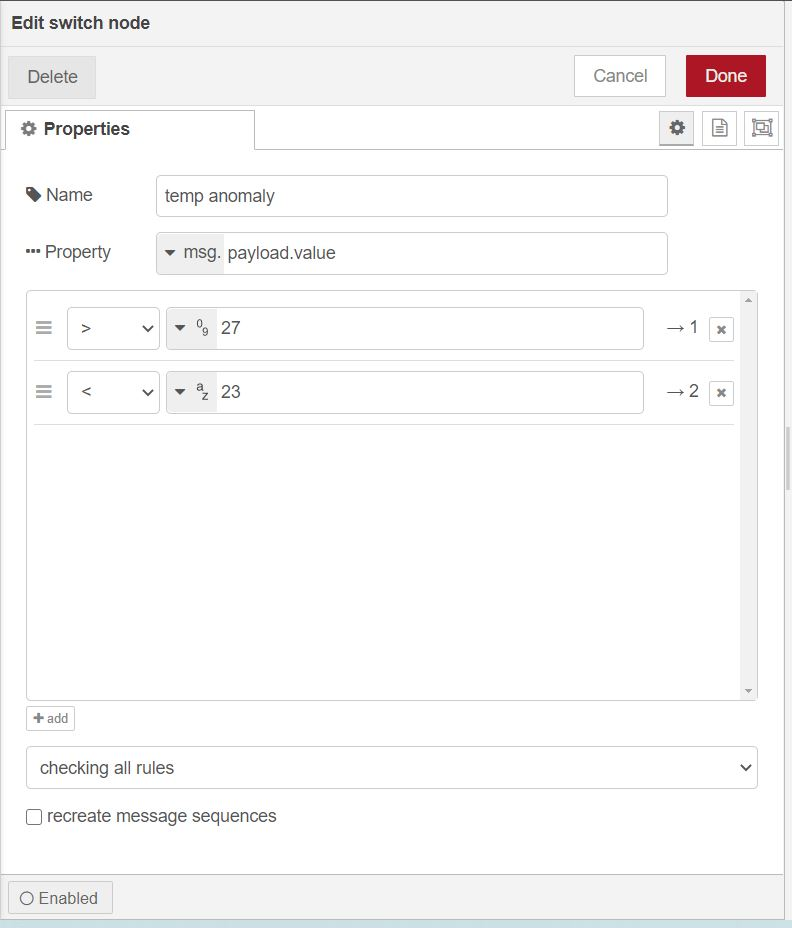

Similar anomaly detection/switches are in place for humidity and co2 as well.  

### <font color='blue'> Data storage </font>

Once we have implemented the anomaly detection, deploy the flow and ensure that you are receiving the raw data as well as anomaly data. 

To utilize the mongodb features, mongodb service installation is required on the node red. To complete this installation follow the below mentioned steps:

* Click on the inequality sign on the top right corner beside deploy as mentioned in the following image. 

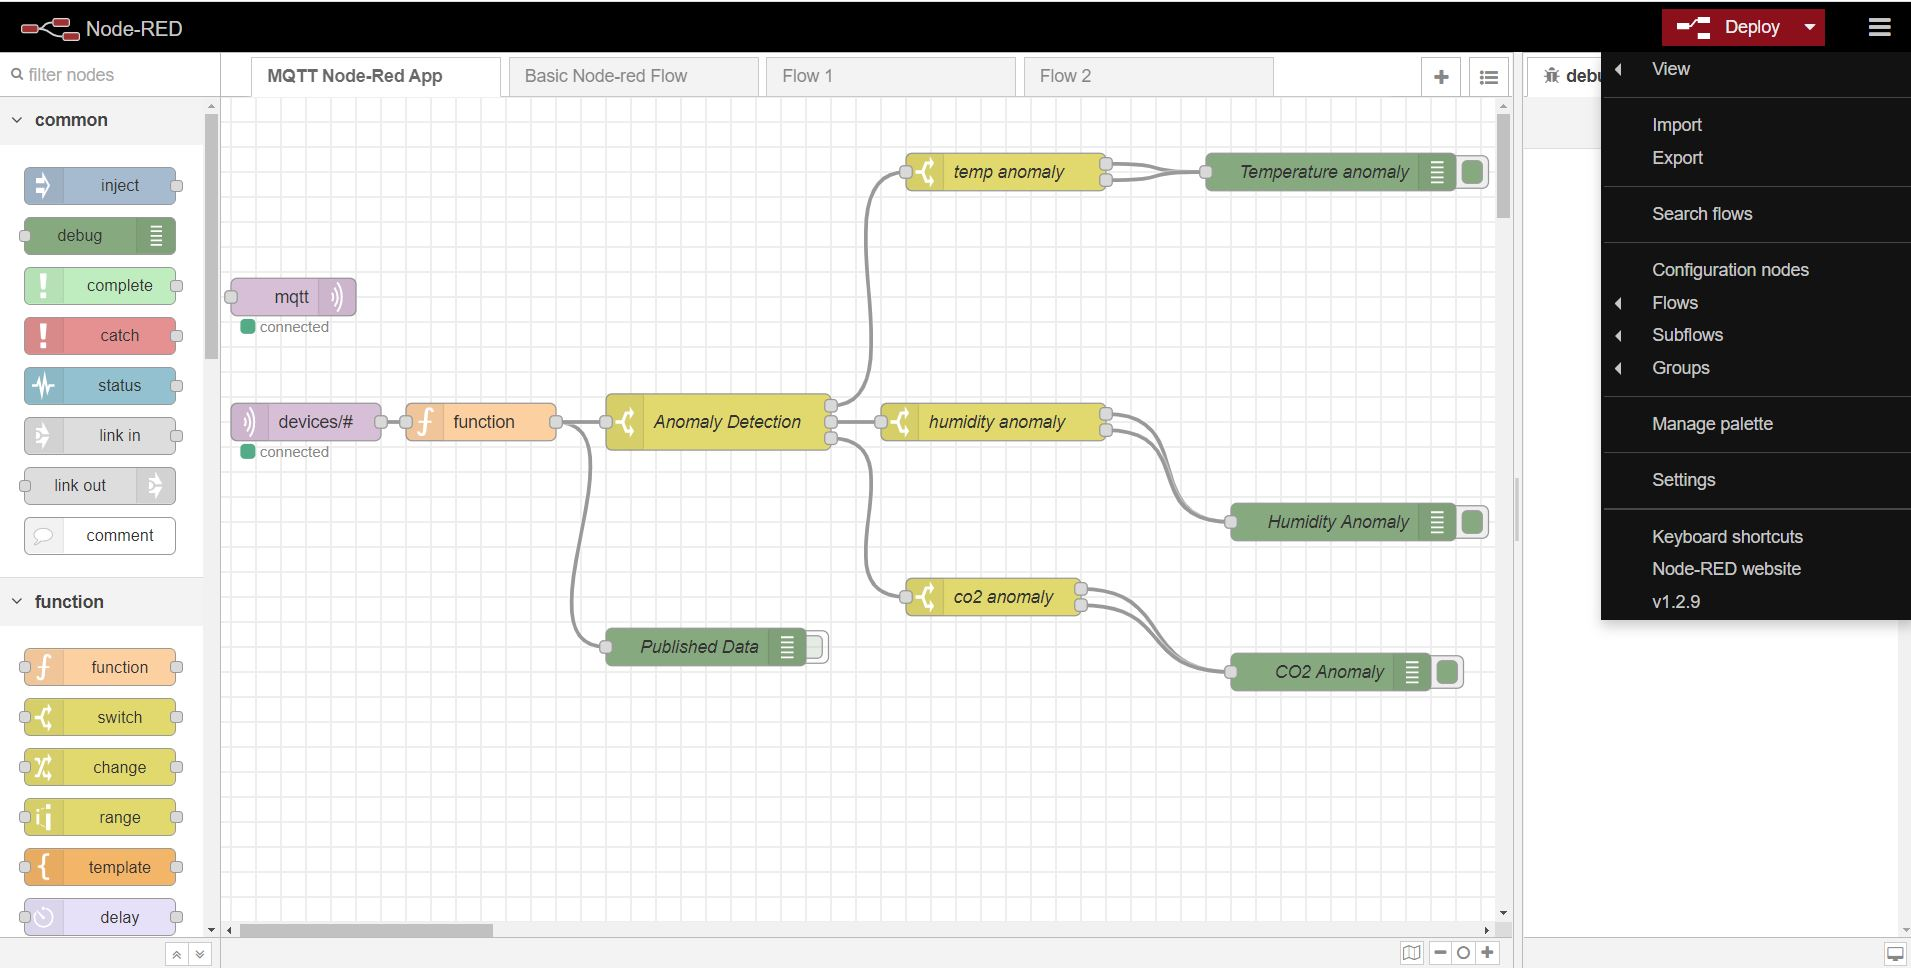

* Choose `Manage palette` in the new window choose the install tab and search for `node-red-node-mongodb`. Click on on install and complete the installation process. Once it is successfully installed mongo related services will be availble under storage in left pane. 

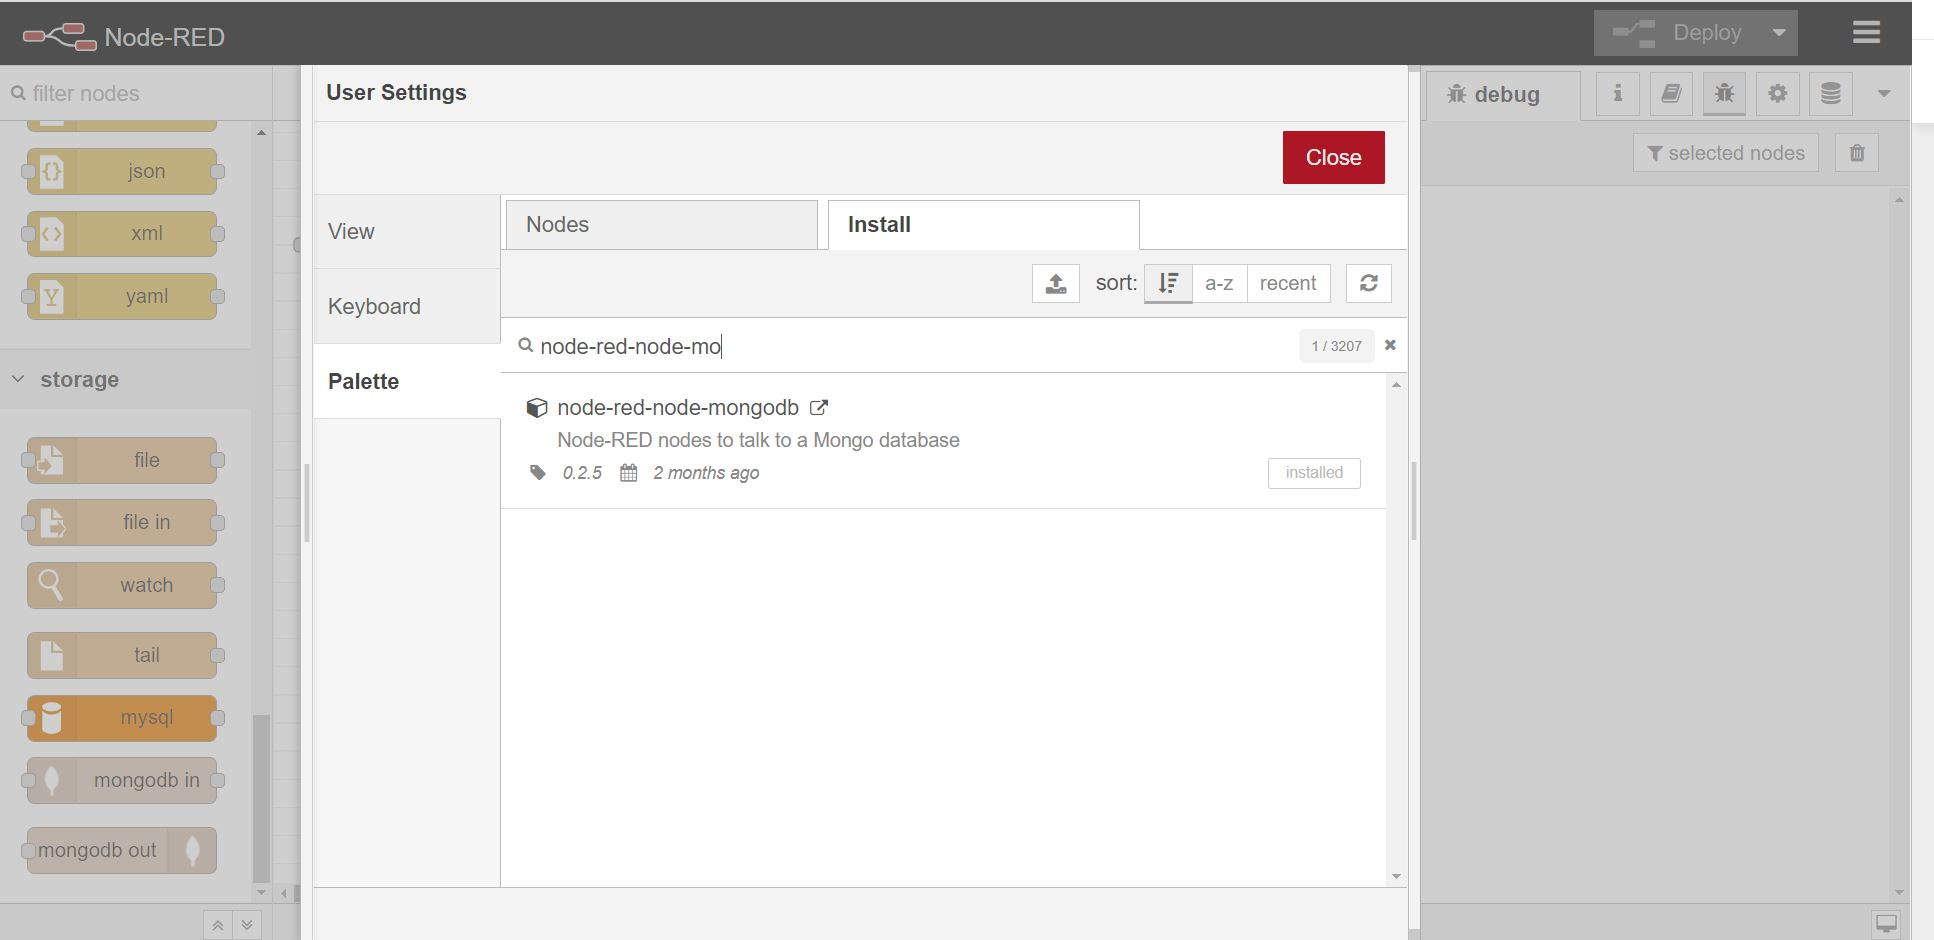


Now, the next part is to store the raw data as well as anomaly data in the database. To enable this feature we have already installed the mongodb library in the node-red. 

Under the storage section look for `mongodb` in and `mongodb out`. 

We need to create the relevant database and table in the mongodb to store the data. 

    * Run the mongodb server on your system. 
    * Open mogodb compass and connect to the server. 
    * Create a new database. 
    * After creating the database, create collection to store raw_data and anomaly_data separately. 
 
Database and collection created in the previous step will be used in node-red. 

1. Double click on mongodb node to edit and perform the setup. 

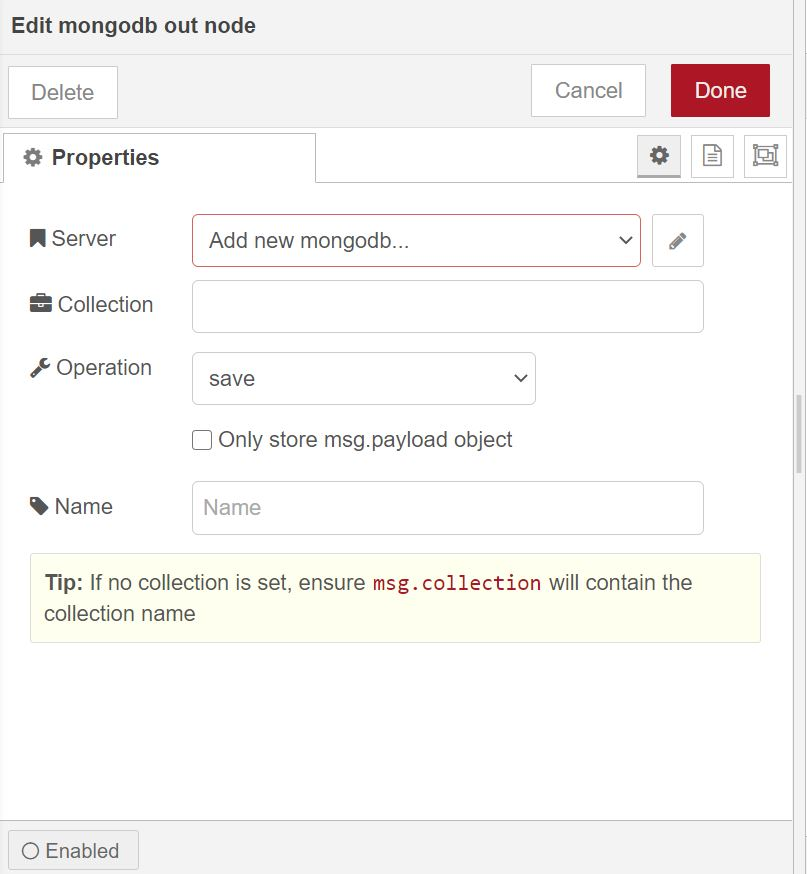

2. Click on server and enter the details such as Databse name which is created using mongodb compass. 

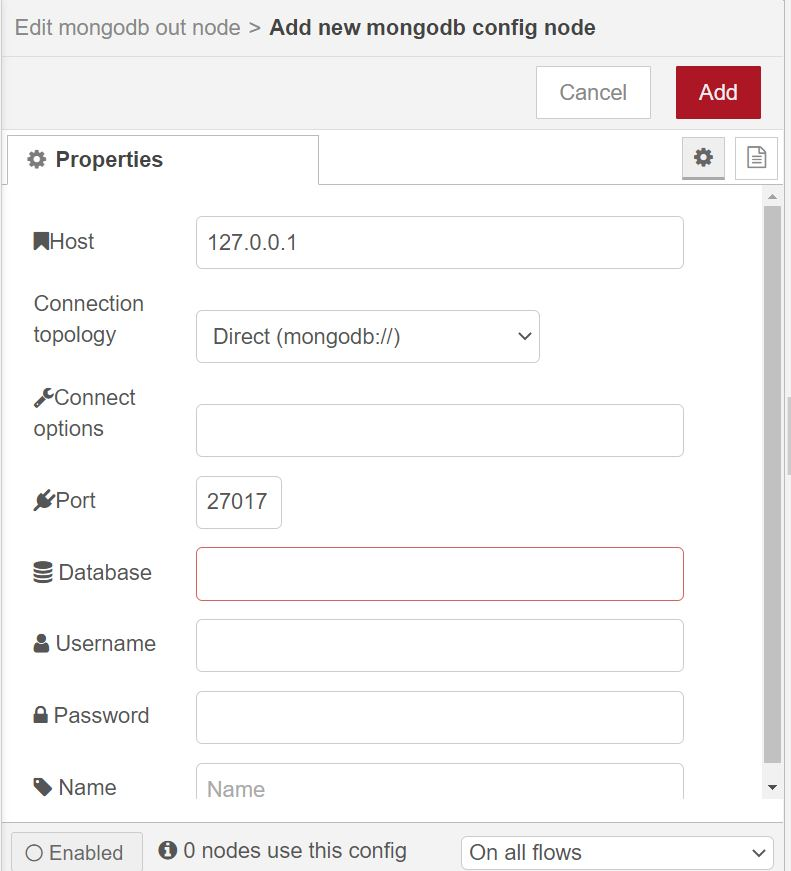

3. Now provide the collection name and choose insert as an operation. Click on only store msg.payload object. Assign a name to the node. 

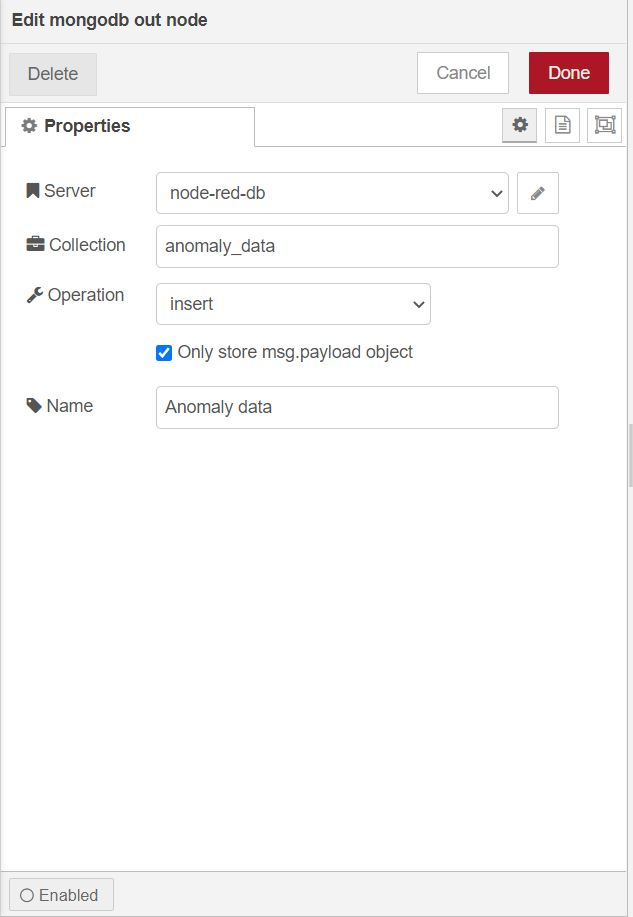
4. Perform step 1, 2, and 3 on another mongodb node to store raw data, Make sure that you are giving correct collection name. No need to provide the server details because we have created the server while creating the first setup. 

5. Now we will create some additional nodes to view the stored data in the DB. Double click on inject button and provide the details as mentioned in the following image : 

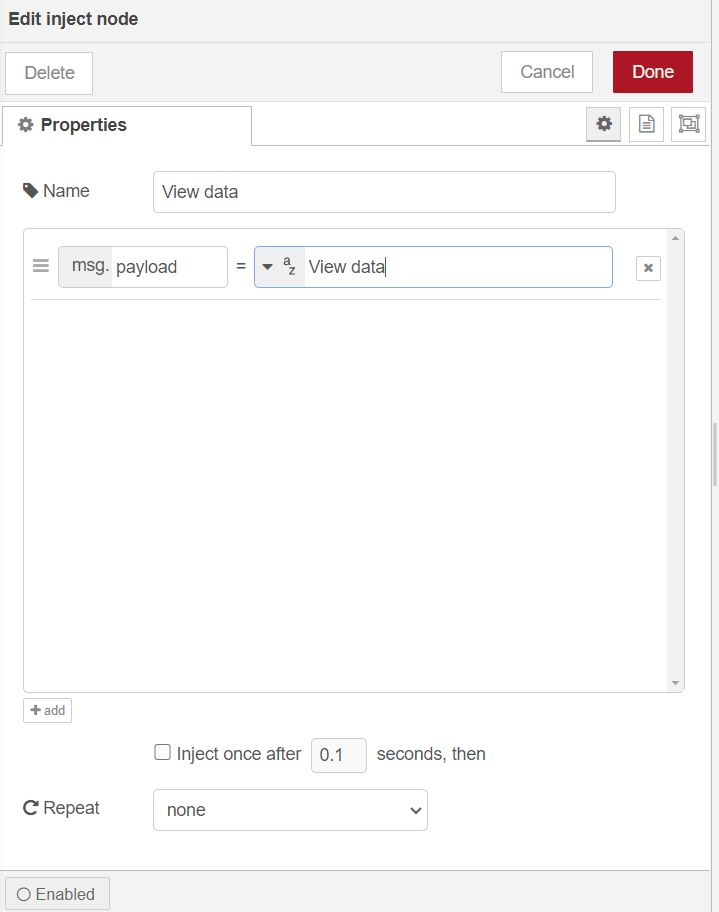

6. Doublce click on created `mongodb in` node. We already have the server from previous step. Provide the collection name to perform the find operation.  

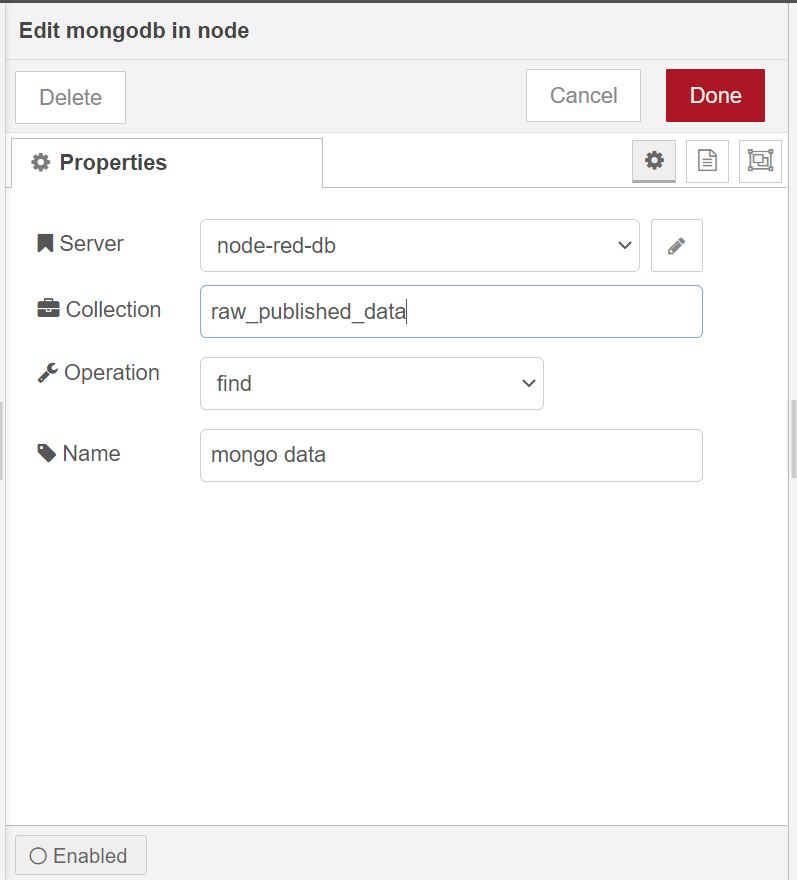

7. Create a debug button and double click on it to edit the name and other informaion. 

Once the complete setup is done. The flow setup will look as mentioned below: 

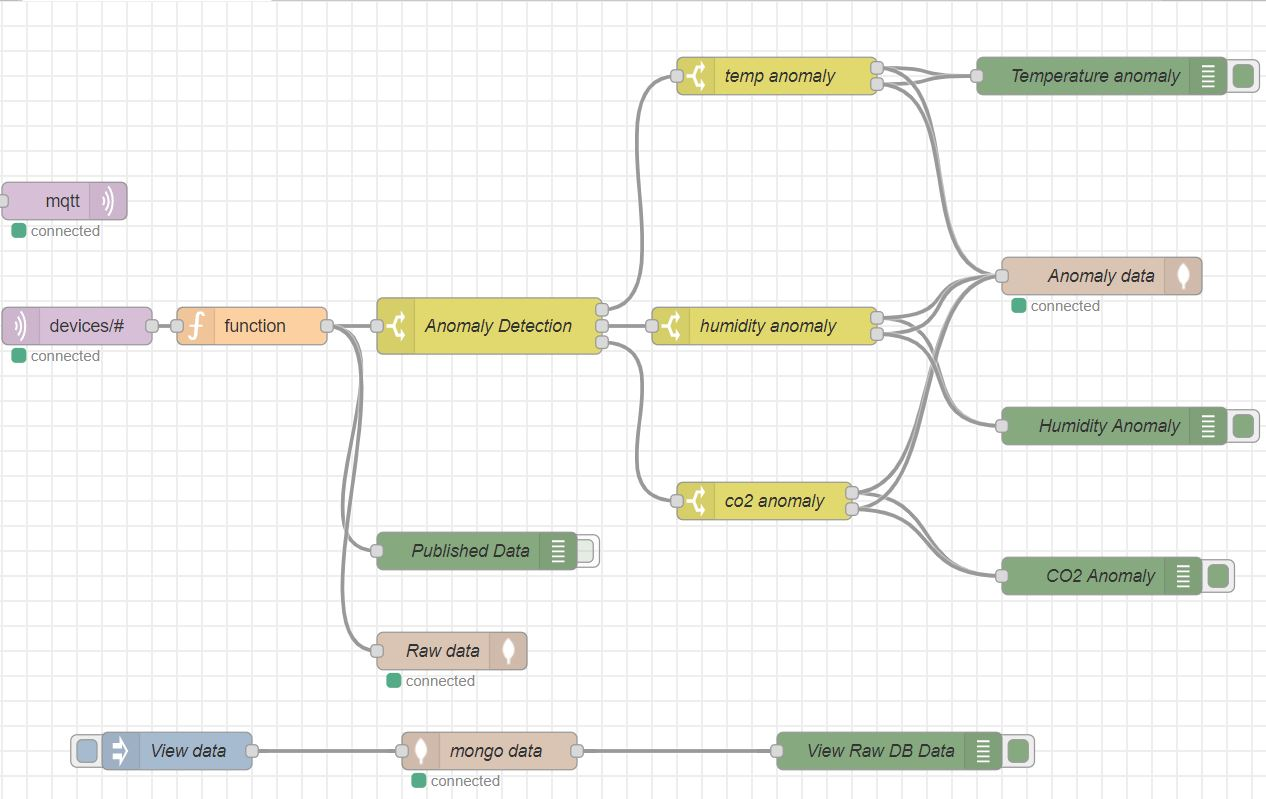


Click on deploy. Make sure that MQTT broker service is running on the same port and server which is provided in the above step along  `publish.py` script. 

Once the flow is deployed it will appear as the following image. 

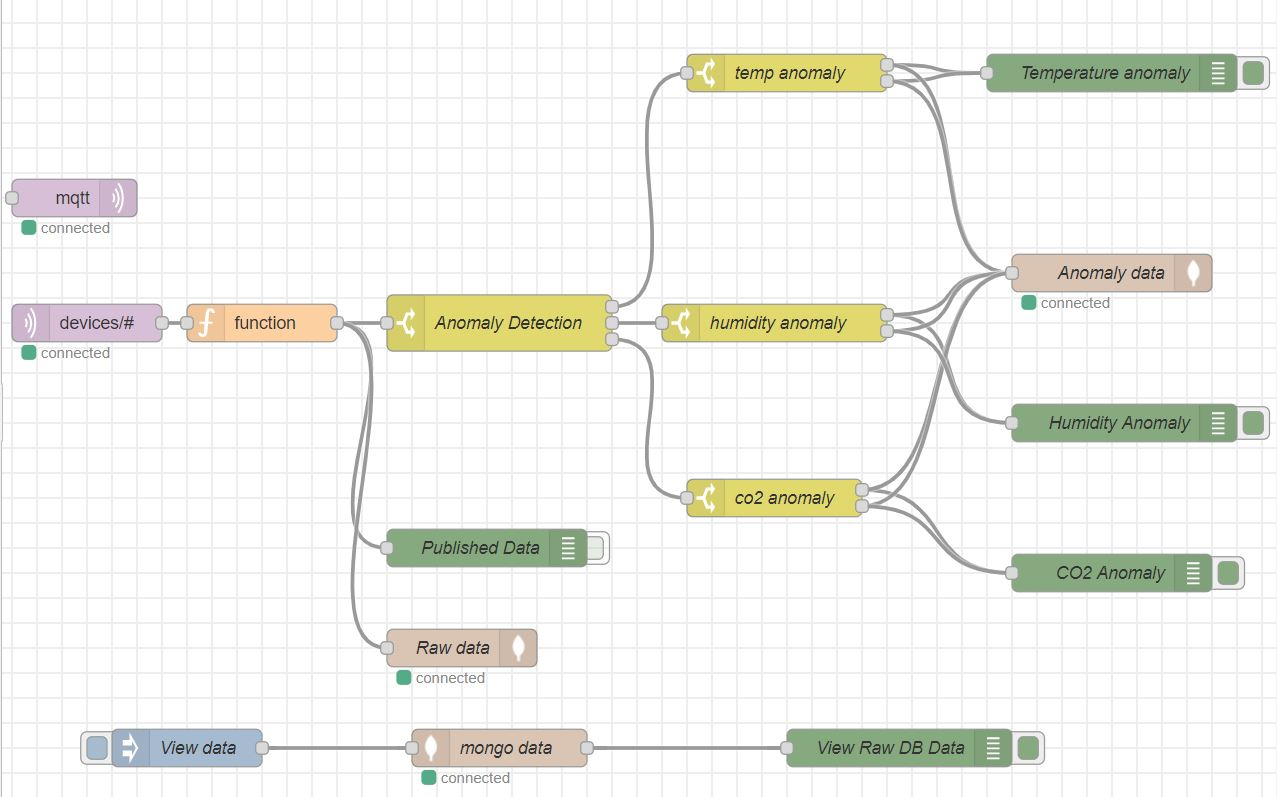

You can enable and disable each of the debug buttons to view the recevied data for different anomaly detection switches. 

Data in mongodb will be stored in the following manner. Please find the relevant image below: 

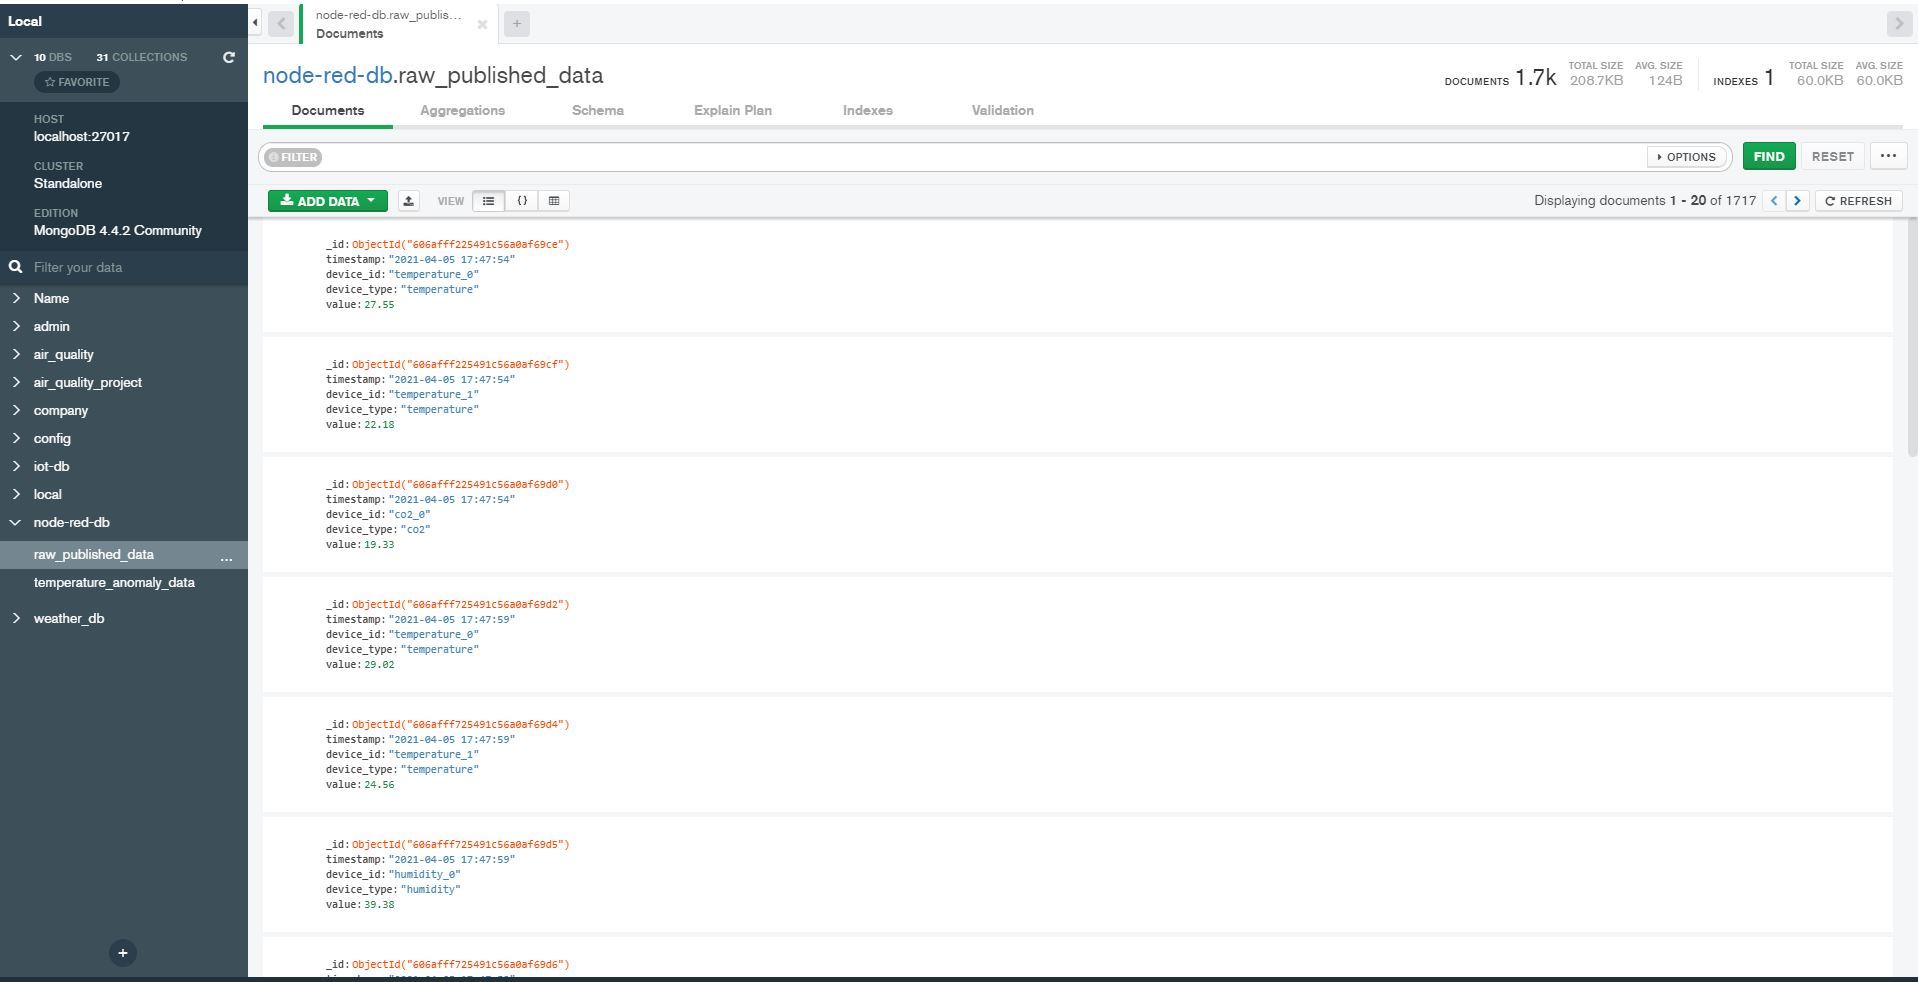
